In [1]:
import re
import gensim
import logging
import nltk.data
import pandas as pd
from nltk.corpus import stopwords
from gensim.models import word2vec
import numpy as np
import wget
import zipfile
from tqdm import tqdm
import random
from sklearn.decomposition import TruncatedSVD
#import warnings
#warnings.filterwarnings('ignore')

In [2]:
from sklearn.cluster import DBSCAN

In [3]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [4]:
#model_url = 'http://vectors.nlpl.eu/repository/11/180.zip'
#m = wget.download(model_url)
#model_file = model_url.split('/')[-1]
model_file = '180.zip'
with zipfile.ZipFile(model_file, 'r') as archive:
    stream = archive.open('model.bin')
    model = gensim.models.KeyedVectors.load_word2vec_format(stream, binary=True)

2022-03-04 11:06:08,158 : INFO : loading projection weights from <zipfile.ZipExtFile name='model.bin' mode='r' compress_type=deflate>
2022-03-04 11:06:19,377 : INFO : KeyedVectors lifecycle event {'msg': 'loaded (189193, 300) matrix of type float32 from <zipfile.ZipExtFile [closed]>', 'binary': True, 'encoding': 'utf8', 'datetime': '2022-03-04T11:06:19.377339', 'gensim': '4.1.2', 'python': '3.8.12 (default, Oct 12 2021, 03:01:40) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19043-SP0', 'event': 'load_word2vec_format'}


In [5]:
all_nouns = []
for w in tqdm(model.index_to_key):
    #print(w)
    if w.split('_')[-1] == 'NOUN':
        all_nouns.append(w)

100%|██████████████████████████████████████████████████████████████████████| 189193/189193 [00:00<00:00, 490520.37it/s]


In [6]:
def get_matrix(all_nouns):
    vectors_of_words = np.zeros((len(all_nouns), model.vector_size))
    for i, word in enumerate(all_nouns):
        vectors_of_words[i] = model[word]
        
    return vectors_of_words

In [ ]:
def lsa_matrix(vectors_of_words, n_components, n_iter=100):
    lsa_obj = TruncatedSVD(n_components=n_components, n_iter=n_iter, random_state=42)
    lsa_data = lsa_obj.fit_transform(vectors_of_words)
    return lsa_data
#Sigma = lsa_obj.singular_values_
#V_T = lsa_obj.components_.T

In [31]:
def clustering(vectors_of_words,  eps=3, min_samples=1000):
    #clustering_data = DBSCAN(eps=eps, min_samples=first_matrix.shape[0]/5).fit(vectors_of_words)
    clustering_data = sklearn.cluster.KMeans(n_clusters=first_matrix.shape[0]//5).fit_predict(vectors_of_words)
    return clustering_data

In [32]:
def sort_results(lsa_data, all_nouns):    
    sorted_scores_indx = np.argsort(lsa_data, axis=0)[::-1]
    result = np.array(all_nouns)[sorted_scores_indx.ravel()]
    result_nums = np.array(lsa_data)[sorted_scores_indx.ravel()]
    return result, result_nums

## Итерация первая

In [33]:
first_matrix = get_matrix(all_nouns)
first_lsa = lsa_matrix(first_matrix, 1)

In [34]:
first_matrix.shape[0]

59107

In [35]:
import sklearn
first_clustering = clustering(first_matrix, 10)

MemoryError: Unable to allocate 1.04 GiB for an array with shape (11821, 11821) and data type float64

In [23]:
first_clustering.labels_

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [24]:
from collections import Counter
Counter(first_clustering.labels_)

Counter({-1: 59101, 0: 6})

In [27]:
for label in set(first_clustering.labels_):
    print('***************************************************************************')
    print(label)
    for i, el in enumerate(first_clustering.labels_):
        if el == label:
            print(all_nouns[i])

***************************************************************************
0
2005.04.01_NOUN
2005.01.11_NOUN
2004.04.02_NOUN
2005.01.10_NOUN
2004.03.31_NOUN
2004.04.01_NOUN
2005.01.12_NOUN
штадивый_NOUN
2005.01.25_NOUN
2004.04.05_NOUN
2005.01.05_NOUN
2005.01.21_NOUN
2005.03.31_NOUN
регул_NOUN
2004.10.21_NOUN
санкт-петербург_NOUN
2005.02.22_NOUN
2005.01.22_NOUN
2004.10.15_NOUN
2005.01.15_NOUN
думаю_NOUN
2005.02.21_NOUN
нет-с_NOUN
2005.02.11_NOUN
2005.02.25_NOUN
2004.10.22_NOUN
толькотец_NOUN
2005.03.25_NOUN
2004.10.12_NOUN
infect_NOUN
москва_NOUN
pp_NOUN
только_NOUN
как-тотец_NOUN
2005.02.15_NOUN
конечнотец_NOUN
2005.04.05_NOUN
чтотец_NOUN
-тотец_NOUN
ed_NOUN
2005.02.02_NOUN
э-э-эра_NOUN
2005.01.31_NOUN
прот_NOUN
степан_NOUN
странно_NOUN
пришеловек_NOUN
штарм_NOUN
ха-ха-ха_NOUN
sci_NOUN
точно_NOUN
кострома_NOUN
псков_NOUN
какая-тотец_NOUN
этимя_NOUN
таксыра_NOUN
наконец_NOUN
-а-ый_NOUN
2004.10.11_NOUN
n.y_NOUN
дурашка_NOUN
лера_NOUN
понятно_NOUN
яша_NOUN
витя_NOUN
зап_NOUN
цир_NOUN
кап

алогизм_NOUN
квть_NOUN
подталкивание_NOUN
соседствый_NOUN
вражий_NOUN
плакаловек_NOUN
сквалыга_NOUN
долл_NOUN
лермонтов_NOUN
удмурт_NOUN
покупк_NOUN
завотделением_NOUN
масоный_NOUN
изреченить_NOUN
впослдствлять_NOUN
киносценарист_NOUN
уком_NOUN
кожушок_NOUN
клубенька_NOUN
гейм_NOUN
остро_NOUN
гудочник_NOUN
печатный_NOUN
постоялка_NOUN
спиридон_NOUN
прессы_NOUN
иначбыть_NOUN
казначея_NOUN
общедоступности_NOUN
иереть_NOUN
объяснена_NOUN
доверительница_NOUN
элси_NOUN
кожуха_NOUN
высечь_NOUN
кс_NOUN
мусс_NOUN
перестрахование_NOUN
просьбица_NOUN
линейность_NOUN
домй-то_NOUN
фальконет_NOUN
поступать_NOUN
цветомузыка_NOUN
строптивый_NOUN
агафья_NOUN
сосудец_NOUN
степа_NOUN
горадминистрация_NOUN
синхронизатор_NOUN
усталя_NOUN
эмфизема_NOUN
разделитель_NOUN
полпачка_NOUN
делаю_NOUN
минтай_NOUN
хайло_NOUN
австрийский_NOUN
безапелляционность_NOUN
слюнотечение_NOUN
пикировщик_NOUN
xl_NOUN
тетерево_NOUN
двигать_NOUN
церковные_NOUN
переплата_NOUN
олигонуклеотид_NOUN
батут_NOUN
камысокий_NOUN
колка_N

зубчатка_NOUN
засветка_NOUN
уценка_NOUN
интенданвать_NOUN
затейница_NOUN
электролюминесценция_NOUN
овсянкий_NOUN
мест_NOUN
есм_NOUN
лэдь_NOUN
сечть_NOUN
четвертака_NOUN
гексахлоран_NOUN
полтавец_NOUN
ионит_NOUN
колесников_NOUN
фальсификат_NOUN
авионик_NOUN
трассер_NOUN
холуйство_NOUN
шт.-кап_NOUN
вогулый_NOUN
анадырь_NOUN
промплощадка_NOUN
страза_NOUN
ефрь_NOUN
забрал_NOUN
фарсь_NOUN
интенсивный_NOUN
грехутор_NOUN
свечников_NOUN
слюноотделение_NOUN
отдленить_NOUN
с.-равнивать_NOUN
башмачка_NOUN
канн_NOUN
живописц_NOUN
благоволить_NOUN
вареника_NOUN
обвязки_NOUN
бабье_NOUN
подумаловек_NOUN
симпкинс_NOUN
смельчака_NOUN
кривляк_NOUN
показаня_NOUN
внец_NOUN
шапсуг_NOUN
оковка_NOUN
пипка_NOUN
харчевне_NOUN
свеклый_NOUN
альвеол_NOUN
прь_NOUN
ходатинский_NOUN
самумый_NOUN
гальванопластика_NOUN
алть_NOUN
сыскарь_NOUN
усложненность_NOUN
150-летий_NOUN
мстислав_NOUN
циклотимия_NOUN
а.ш_NOUN
силенок_NOUN
рэпер_NOUN
почть_NOUN
биопрепарат_NOUN
михась_NOUN
человекоубийство_NOUN
аида_NOUN
офицюрус_N

слдый_NOUN
роскошный_NOUN
бестие_NOUN
конспирология_NOUN
тоскан_NOUN
спортпрототип_NOUN
содержащемуся_NOUN
жермёль_NOUN
петрыэлтор_NOUN
мановений_NOUN
неплохо_NOUN
багр_NOUN
флешка_NOUN
вёдро_NOUN
оглоед_NOUN
папиросник_NOUN
малостий_NOUN
антипа_NOUN
жбыть_NOUN
актерк_NOUN
костоправа_NOUN
уэльс_NOUN
переулкать_NOUN
службишка_NOUN
скребком_NOUN
сарафана_NOUN
член-корр_NOUN
колкий_NOUN
метелкий_NOUN
клякс_NOUN
немнога_NOUN
понарошке_NOUN
впусте_NOUN
бунтовщикий_NOUN
неаполь_NOUN
семнадцатилетний_NOUN
1в_NOUN
кандидаткий_NOUN
промедол_NOUN
необходимый_NOUN
медление_NOUN
семицветик_NOUN
usd_NOUN
благословенние_NOUN
арыка_NOUN
одноклубник_NOUN
астронавигатхор_NOUN
ответработник_NOUN
вырезание_NOUN
попасть_NOUN
стереоизомер_NOUN
гигрометр_NOUN
архиеп_NOUN
задк_NOUN
видеоаппаратура_NOUN
людовище_NOUN
чухон_NOUN
уже_NOUN
vs_NOUN
юннинать_NOUN
уник_NOUN
пережитка_NOUN
хоп_NOUN
алхимика_NOUN
клинец_NOUN
свояченицый_NOUN
гиксос_NOUN
псальм_NOUN
смехота_NOUN
скрипица_NOUN
разрывать_NOUN
иконоборче

влажный_NOUN
захламленность_NOUN
полкан_NOUN
цитатник_NOUN
сухожилия_NOUN
соленоида_NOUN
нестеров_NOUN
самофинансирование_NOUN
брь_NOUN
правительницея_NOUN
планк_NOUN
черемушки_NOUN
агафангел_NOUN
сталинизмй_NOUN
премьерш_NOUN
камералка_NOUN
артек_NOUN
нача_NOUN
мик_NOUN
мельчук_NOUN
всякть_NOUN
европеизмый_NOUN
византинизм_NOUN
лампу_NOUN
ступь_NOUN
сти_NOUN
иеросхимон_NOUN
присудствие_NOUN
парвус_NOUN
крикливость_NOUN
генерал-фелтьмаршал_NOUN
легка_NOUN
теченю_NOUN
ежи_NOUN
щелочки_NOUN
беккет_NOUN
сослужать_NOUN
грузика_NOUN
чистяк_NOUN
свднiе_NOUN
кипячения_NOUN
каменнай_NOUN
антилопый_NOUN
брюх_NOUN
остеречься_NOUN
фракционер_NOUN
работали_NOUN
глюцилин_NOUN
компаньонк_NOUN
добытчиок_NOUN
подсчету_NOUN
зомбирование_NOUN
вперевалочку_NOUN
неиспользований_NOUN
киносеть_NOUN
нельзя_NOUN
возчикий_NOUN
дефилея_NOUN
бывалыча_NOUN
-культура_NOUN
местничествый_NOUN
древкий_NOUN
этаноть_NOUN
волонтирать_NOUN
четырй-то_NOUN
водяр_NOUN
дистиллятор_NOUN
велике_NOUN
гадюк_NOUN
наймо_NOUN
старт

камен_NOUN
нужнай_NOUN
грамотник_NOUN
сайма_NOUN
папенькин_NOUN
г[ород_NOUN
скорчер_NOUN
цыпленокий_NOUN
альтернативный_NOUN
кресс-салат_NOUN
кружений_NOUN
жибаотец_NOUN
наполеончик_NOUN
липки_NOUN
талей_NOUN
безуспешности_NOUN
осуществленить_NOUN
шильдик_NOUN
премирования_NOUN
ковшичек_NOUN
дранкий_NOUN
соцстрах_NOUN
ежиха_NOUN
береженье_NOUN
пиропатрон_NOUN
кабаливать_NOUN
закругленность_NOUN
-свет_NOUN
рериха_NOUN
трепло_NOUN
сватушка_NOUN
евразийствый_NOUN
грустный_NOUN
ницця_NOUN
а.лийский_NOUN
катаром_NOUN
гварди_NOUN
распорот_NOUN
лавровый_NOUN
птуха_NOUN
пранкер_NOUN
подсказ_NOUN
выпивание_NOUN
детмага_NOUN
госдача_NOUN
ломтема_NOUN
турус_NOUN
спалтраница_NOUN
библотек_NOUN
доносяча_NOUN
высокопреподобие_NOUN
зильберберг_NOUN
хартие_NOUN
яица_NOUN
гидротехника_NOUN
песнотворчество_NOUN
поселочка_NOUN
мостовина_NOUN
ландшафтник_NOUN
ориф_NOUN
карбонил_NOUN
перерабль_NOUN
лебяжка_NOUN
приметка_NOUN
щиблетов_NOUN
нкоторой_NOUN
хаосяча_NOUN
новогодний_NOUN
священствый_NOUN
грамотки

птах_NOUN
холодрыг_NOUN
столкновеня_NOUN
подчеркнутость_NOUN
эфемерид_NOUN
укрпленiе_NOUN
геномика_NOUN
шальной_NOUN
переувлажнение_NOUN
рассохаться_NOUN
зрлистый_NOUN
четвертина_NOUN
дуалист_NOUN
донжон_NOUN
завкомй_NOUN
лопадать_NOUN
германизация_NOUN
культкомиссия_NOUN
/п_NOUN
гельмет_NOUN
создани_NOUN
классе_NOUN
промывальщик_NOUN
тай-брейк_NOUN
послдня_NOUN
хиромантий_NOUN
лапонька_NOUN
отпугивание_NOUN
угашение_NOUN
теплые_NOUN
потный_NOUN
отворить_NOUN
мандарина_NOUN
сокольника_NOUN
дефектолог_NOUN
трусоватый_NOUN
переехать_NOUN
схлопывание_NOUN
английска_NOUN
припухнуть_NOUN
шизо_NOUN
упрощенчество_NOUN
туберкулин_NOUN
эз_NOUN
выделывание_NOUN
славянствй_NOUN
международнай_NOUN
разбросать_NOUN
платонов_NOUN
звездообразование_NOUN
гурманый_NOUN
клук_NOUN
гигантизй_NOUN
самохарактеристика_NOUN
вебстер_NOUN
академгородка_NOUN
штрихкод_NOUN
одеревенелость_NOUN
русь_NOUN
зверол_NOUN
цзь_NOUN
пешкомя_NOUN
предсуществование_NOUN
маленькотец_NOUN
миллионерка_NOUN
горячесть_NOUN
рош_NOU

e2_NOUN
e1_NOUN
***************************************************************************
16
сервитут_NOUN
сервитута_NOUN
сервитать_NOUN
***************************************************************************
17
-юнион_NOUN
тред_NOUN
***************************************************************************
18
привой_NOUN
подвой_NOUN
***************************************************************************
19
a2_NOUN
c2_NOUN
***************************************************************************
20
бэнк_NOUN
мерчанть_NOUN
***************************************************************************
21
шансона_NOUN
шансон_NOUN
***************************************************************************
22
пинаколин_NOUN
пинакон_NOUN
***************************************************************************
23
женскай_NOUN
мужескай_NOUN
***************************************************************************
24
госпакет_NOUN
госпакевать_NOUN
********************************

решетка_NOUN
сценарий_NOUN
манера_NOUN
зелень_NOUN
скамейка_NOUN
палуба_NOUN
дома_NOUN
близость_NOUN
сокращение_NOUN
минимум_NOUN
таблица_NOUN
уничтожение_NOUN
усадьба_NOUN
столкновение_NOUN
вооружение_NOUN
повесть_NOUN
сумерки_NOUN
глазок_NOUN
простота_NOUN
сигарета_NOUN
математика_NOUN
младенец_NOUN
измерение_NOUN
кафедра_NOUN
вздох_NOUN
рюмка_NOUN
пресса_NOUN
сторож_NOUN
грек_NOUN
командование_NOUN
сорт_NOUN
барыня_NOUN
гнездо_NOUN
цветок_NOUN
поклон_NOUN
авиация_NOUN
сок_NOUN
посольство_NOUN
муха_NOUN
мудрость_NOUN
роза_NOUN
пот_NOUN
нрав_NOUN
сарай_NOUN
верх_NOUN
устав_NOUN
пауза_NOUN
усы_NOUN
быть_NOUN
медицина_NOUN
прибыль_NOUN
миллиметр_NOUN
допрос_NOUN
пруд_NOUN
поза_NOUN
простор_NOUN
справка_NOUN
съемка_NOUN
ширина_NOUN
базар_NOUN
окрестность_NOUN
балкон_NOUN
оплата_NOUN
татарин_NOUN
молекула_NOUN
сборник_NOUN
сходство_NOUN
прогресс_NOUN
эффективность_NOUN
размышление_NOUN
кот_NOUN
полнота_NOUN
пещера_NOUN
зрелище_NOUN
картошка_NOUN
милиционер_NOUN
пластинка_NOUN
установление

истощение_NOUN
клоп_NOUN
несогласие_NOUN
косметика_NOUN
выброс_NOUN
карцер_NOUN
матрица_NOUN
футболист_NOUN
изголовье_NOUN
провокатор_NOUN
уют_NOUN
неведение_NOUN
задний_NOUN
репортаж_NOUN
притяжение_NOUN
влажность_NOUN
поверка_NOUN
отрыв_NOUN
чулан_NOUN
курение_NOUN
четвереньки_NOUN
маятник_NOUN
теракт_NOUN
созвездие_NOUN
сельсовет_NOUN
трясти_NOUN
погрузка_NOUN
голубушка_NOUN
повелитель_NOUN
щетина_NOUN
нотариус_NOUN
реестр_NOUN
прокат_NOUN
пассаж_NOUN
теща_NOUN
стипендия_NOUN
иней_NOUN
извещение_NOUN
мутация_NOUN
диакон_NOUN
застолье_NOUN
обладание_NOUN
подать_NOUN
серый_NOUN
кубик_NOUN
неприкосновенность_NOUN
присмотр_NOUN
мачеха_NOUN
дюйм_NOUN
взмах_NOUN
семечко_NOUN
форт_NOUN
крылышко_NOUN
россыпь_NOUN
морковь_NOUN
поучение_NOUN
нести_NOUN
обсерватория_NOUN
бинт_NOUN
полимер_NOUN
будущность_NOUN
стык_NOUN
ковш_NOUN
палисадник_NOUN
чувствование_NOUN
уточнение_NOUN
ларек_NOUN
воинство_NOUN
железнодорожник_NOUN
датчик_NOUN
длительность_NOUN
репортер_NOUN
спонсор_NOUN
счеты_NOUN
жена

носорог_NOUN
эмульсия_NOUN
самоучка_NOUN
перебежчик_NOUN
бюджетник_NOUN
лепта_NOUN
кремль_NOUN
сатирик_NOUN
эстонец_NOUN
мерцание_NOUN
главврач_NOUN
селекция_NOUN
буйвол_NOUN
пожарище_NOUN
шампунь_NOUN
обрезка_NOUN
ратуша_NOUN
бегун_NOUN
предтеча_NOUN
искоренение_NOUN
сброс_NOUN
заутрена_NOUN
впопыхах_NOUN
вещание_NOUN
землемер_NOUN
приставка_NOUN
отпущение_NOUN
щиток_NOUN
командор_NOUN
заминка_NOUN
гармонь_NOUN
апофеоз_NOUN
отговорка_NOUN
гаишник_NOUN
почтамт_NOUN
мышьяк_NOUN
регистр_NOUN
уметь_NOUN
вождение_NOUN
месец_NOUN
таня_NOUN
выделка_NOUN
стезя_NOUN
презерватив_NOUN
интеллигентность_NOUN
сонм_NOUN
курятник_NOUN
колючий_NOUN
мсий_NOUN
пеня_NOUN
комплектация_NOUN
зипун_NOUN
пюре_NOUN
нотация_NOUN
парапет_NOUN
утеха_NOUN
подножье_NOUN
тезка_NOUN
тельце_NOUN
психотерапия_NOUN
декламация_NOUN
всемогущество_NOUN
константа_NOUN
напутствие_NOUN
проток_NOUN
амвон_NOUN
литье_NOUN
бесценок_NOUN
корректив_NOUN
армяк_NOUN
чемя_NOUN
неверность_NOUN
мегаполис_NOUN
гнусность_NOUN
галун_NOUN
р

ложность_NOUN
доходяга_NOUN
танцовщик_NOUN
брючки_NOUN
поправление_NOUN
мерило_NOUN
прогрессия_NOUN
безрассудство_NOUN
ультразвук_NOUN
безветрие_NOUN
борение_NOUN
избранница_NOUN
рок-н-ролл_NOUN
пошиб_NOUN
ирис_NOUN
турникет_NOUN
форсирование_NOUN
мамзель_NOUN
хлопотать_NOUN
судостроение_NOUN
пластилин_NOUN
и._NOUN
ясновидение_NOUN
правомерность_NOUN
сахарница_NOUN
тд_NOUN
кабинетик_NOUN
венгерка_NOUN
полуверста_NOUN
домя_NOUN
гречиха_NOUN
расхищение_NOUN
съедение_NOUN
барство_NOUN
подложка_NOUN
бытье_NOUN
фармакология_NOUN
пресвитер_NOUN
целеустремленность_NOUN
спросонок_NOUN
говорок_NOUN
ритор_NOUN
портной_NOUN
умонастроение_NOUN
архетип_NOUN
гоголь_NOUN
протодиакон_NOUN
слоган_NOUN
шампиньон_NOUN
прояснение_NOUN
двадцатка_NOUN
нападать_NOUN
деторождение_NOUN
портмоне_NOUN
твердости_NOUN
помолвка_NOUN
былой_NOUN
форвард_NOUN
стоматолог_NOUN
кладовщик_NOUN
газель_NOUN
лохань_NOUN
обособленность_NOUN
побрякушка_NOUN
торшер_NOUN
президентство_NOUN
перепутье_NOUN
водительство_NOUN
культу

полезть_NOUN
иволга_NOUN
гангрена_NOUN
гладиолус_NOUN
особист_NOUN
кадмия_NOUN
недоработка_NOUN
варница_NOUN
тридцатьчетверка_NOUN
ушат_NOUN
всход_NOUN
гримаска_NOUN
тушить_NOUN
мафиози_NOUN
перепланировка_NOUN
малинник_NOUN
крановщик_NOUN
нив_NOUN
косец_NOUN
губком_NOUN
билль_NOUN
гебист_NOUN
генерал-фельдмаршал_NOUN
времянка_NOUN
ока_NOUN
подтек_NOUN
электропоезд_NOUN
собственный_NOUN
фуга_NOUN
потрескивание_NOUN
бесстрастие_NOUN
утомляемость_NOUN
кириллица_NOUN
термостат_NOUN
кончать_NOUN
больничка_NOUN
нефтедобыча_NOUN
дробилка_NOUN
кельнер_NOUN
удаленность_NOUN
финляндец_NOUN
кровоподтека_NOUN
фортель_NOUN
слышание_NOUN
сатрап_NOUN
вкривь_NOUN
встрча_NOUN
кетчуп_NOUN
тождественность_NOUN
жилица_NOUN
-есть_NOUN
опричнина_NOUN
индиго_NOUN
большевичка_NOUN
каракуля_NOUN
популяризатор_NOUN
котл_NOUN
отделать_NOUN
нп_NOUN
вдохновенье_NOUN
тормашки_NOUN
лицезрение_NOUN
систематик_NOUN
переориентация_NOUN
интервьюер_NOUN
переносье_NOUN
малица_NOUN
мамынька_NOUN
метастаз_NOUN
предоплата_N

крашение_NOUN
опытный_NOUN
чесать_NOUN
нкоторыть_NOUN
амин_NOUN
психопатология_NOUN
филадельфия_NOUN
ленинград_NOUN
камея_NOUN
землепашец_NOUN
грызня_NOUN
прессование_NOUN
пастель_NOUN
центрифуга_NOUN
тереть_NOUN
метафор_NOUN
магнезия_NOUN
тютелька_NOUN
пыхтение_NOUN
багульник_NOUN
минералог_NOUN
числитель_NOUN
румяный_NOUN
марийк_NOUN
орангутанг_NOUN
жмых_NOUN
бесчестье_NOUN
водосток_NOUN
адам_NOUN
таращить_NOUN
рокер_NOUN
зябь_NOUN
майорша_NOUN
реторта_NOUN
пожаротушение_NOUN
плашка_NOUN
рученька_NOUN
никифор_NOUN
лесоматериал_NOUN
истолкователь_NOUN
импичмент_NOUN
заморочка_NOUN
распашонка_NOUN
паровик_NOUN
бридж_NOUN
просвир_NOUN
даниил_NOUN
частное_NOUN
всть_NOUN
кимберлит_NOUN
гок_NOUN
правнучка_NOUN
хрипение_NOUN
сакура_NOUN
коррелация_NOUN
сапиенс_NOUN
депутаций_NOUN
сретение_NOUN
спой_NOUN
исполнена_NOUN
хулитель_NOUN
отдыхать_NOUN
неудовлетвореннодать_NOUN
сверхпроводник_NOUN
перекать_NOUN
баклуши_NOUN
смежник_NOUN
тол_NOUN
галичанин_NOUN
мустанг_NOUN
фотопластинка_NOUN
истор

магараджа_NOUN
цокот_NOUN
салоники_NOUN
шушуканье_NOUN
мелкость_NOUN
энергоблок_NOUN
закаливание_NOUN
памятный_NOUN
пивной_NOUN
выдержанность_NOUN
домком_NOUN
свистнуть_NOUN
штриховка_NOUN
молоденький_NOUN
баша_NOUN
убоина_NOUN
шихта_NOUN
щец_NOUN
колониализм_NOUN
казацкий_NOUN
a.m_NOUN
криминализация_NOUN
отголоска_NOUN
молоканин_NOUN
магнитола_NOUN
денник_NOUN
рабкор_NOUN
фатализй_NOUN
сапа_NOUN
синхронность_NOUN
рубидий_NOUN
комля_NOUN
поло_NOUN
поплыть_NOUN
основательница_NOUN
пидор_NOUN
грузобагаж_NOUN
промышленника_NOUN
задка_NOUN
саддукей_NOUN
соболий_NOUN
государей_NOUN
негодяйка_NOUN
эксплуатировать_NOUN
случый_NOUN
пе_NOUN
приоритетность_NOUN
тиар_NOUN
панталык_NOUN
крюшон_NOUN
приспособленец_NOUN
автоспорвать_NOUN
возбудитеть_NOUN
сращивание_NOUN
стенограф_NOUN
мезон_NOUN
сiй_NOUN
150-летие_NOUN
барион_NOUN
овощной_NOUN
сир_NOUN
полупальто_NOUN
андрей_NOUN
стрижи_NOUN
шкун_NOUN
трясучка_NOUN
пигментация_NOUN
куренье_NOUN
гвардейец_NOUN
вв_NOUN
отдлень_NOUN
шутиха_NOUN
хренов

спасительность_NOUN
сбытый_NOUN
преступлена_NOUN
поплавк_NOUN
сухостой_NOUN
изм_NOUN
плановик_NOUN
четыреугольник_NOUN
завкома_NOUN
октябренок_NOUN
ами_NOUN
октав_NOUN
наркотрафик_NOUN
пагод_NOUN
полпуда_NOUN
жердина_NOUN
пребыван_NOUN
окружком_NOUN
-одинехонек_NOUN
ушица_NOUN
нелюдимость_NOUN
невежд_NOUN
гипнотизм_NOUN
стезе_NOUN
зарезать_NOUN
вклейка_NOUN
перцепция_NOUN
галдеть_NOUN
череповца_NOUN
матюг_NOUN
лунатика_NOUN
суперлига_NOUN
наемый_NOUN
мегаэлектронвольт_NOUN
перлюстрация_NOUN
эпидемие_NOUN
брасс_NOUN
монолитность_NOUN
несмышленыш_NOUN
м-ль_NOUN
рестрикция_NOUN
диагност_NOUN
трансценденция_NOUN
туесок_NOUN
бендера_NOUN
постановлеень_NOUN
будеша_NOUN
скрипт_NOUN
плебс_NOUN
выпункт_NOUN
-мачех_NOUN
взаимозаменяемость_NOUN
жка_NOUN
ногай_NOUN
комор_NOUN
справа_NOUN
единоначалие_NOUN
свистк_NOUN
книготорговец_NOUN
лганье_NOUN
условь_NOUN
рислинг_NOUN
заговенье_NOUN
планетолет_NOUN
отпускной_NOUN
тесать_NOUN
анаграмма_NOUN
теплоемкость_NOUN
рабочай_NOUN
корабельщика_NOUN
призм

заплота_NOUN
благоприятность_NOUN
м.демик_NOUN
росписка_NOUN
ракетоносец_NOUN
колотье_NOUN
кикбоксер_NOUN
назидательность_NOUN
автономный_NOUN
товарыщь_NOUN
приказанье_NOUN
грабительствый_NOUN
ритейл_NOUN
гомункулус_NOUN
злоречие_NOUN
оркестрик_NOUN
голодомор_NOUN
бубон_NOUN
шах-зад_NOUN
поварна_NOUN
снеговик_NOUN
целеуказаний_NOUN
строевик_NOUN
отверженец_NOUN
позерство_NOUN
прыганье_NOUN
тэст_NOUN
турк_NOUN
генерал-маиор_NOUN
суннит_NOUN
объемность_NOUN
антилоп_NOUN
проявить_NOUN
лектотип_NOUN
комедиограф_NOUN
паст_NOUN
уврачевание_NOUN
матросня_NOUN
опалубок_NOUN
легитимизм_NOUN
тесно_NOUN
землевладений_NOUN
оханье_NOUN
полуфраза_NOUN
резиньяция_NOUN
видеосъемка_NOUN
рок-группа_NOUN
радиоисточник_NOUN
неучтивость_NOUN
шелководство_NOUN
фзу_NOUN
авиадиспетчер_NOUN
урочища_NOUN
пролетарить_NOUN
аккомодация_NOUN
помыслить_NOUN
психастение_NOUN
паланкин_NOUN
верблюдица_NOUN
огорожа_NOUN
посева_NOUN
интерферометр_NOUN
саботажй_NOUN
вервие_NOUN
ситчик_NOUN
стремленье_NOUN
магазинщик_NOUN


In [15]:
words_for_second = []
        
for i, el in enumerate(first_clustering.labels_):
    if el == -1:
        words_for_second.append(all_nouns[i])

## Итерация вторая

In [27]:
second_matrix = get_matrix(words_for_second)
second_clustering = clustering(second_matrix, 20)

In [28]:
Counter(second_clustering.labels_)

Counter({-1: 5296,
         0: 2,
         1: 11340,
         2: 2,
         3: 2,
         4: 2,
         5: 4,
         6: 2,
         7: 2,
         8: 2,
         9: 2,
         10: 2,
         11: 2,
         12: 4,
         13: 2,
         14: 2,
         15: 4,
         16: 2,
         17: 2,
         18: 2,
         19: 2,
         20: 3,
         21: 2,
         22: 2,
         23: 2,
         24: 3,
         25: 2,
         26: 2,
         27: 2,
         28: 5,
         29: 2,
         30: 2,
         31: 2,
         32: 2,
         33: 2,
         34: 2,
         35: 2,
         36: 3,
         37: 2,
         38: 2,
         39: 2,
         40: 2,
         41: 2,
         42: 2,
         43: 2,
         44: 2,
         45: 2,
         46: 6,
         47: 2,
         48: 2,
         49: 2,
         50: 3,
         51: 2,
         52: 3,
         53: 2,
         54: 2,
         55: 2,
         56: 2,
         57: 2,
         58: 4,
         59: 3,
         60: 2,
         61

In [29]:
for label in set(second_clustering.labels_):
    print('***************************************************************************')
    print(label)
    for i, el in enumerate(second_clustering.labels_):
        if el == label:
            print(words_for_second[i])

***************************************************************************
0
город_NOUN
столица_NOUN
***************************************************************************
1
отец_NOUN
жена_NOUN
пора_NOUN
мать_NOUN
машина_NOUN
брат_NOUN
товарищ_NOUN
муж_NOUN
река_NOUN
гость_NOUN
старик_NOUN
генерал_NOUN
девушка_NOUN
хозяин_NOUN
мама_NOUN
писатель_NOUN
мальчик_NOUN
правда_NOUN
девочка_NOUN
сестра_NOUN
мужик_NOUN
собака_NOUN
немец_NOUN
художник_NOUN
врач_NOUN
кабинет_NOUN
дядя_NOUN
капитан_NOUN
профессор_NOUN
черт_NOUN
ребята_NOUN
стих_NOUN
бабушка_NOUN
парень_NOUN
автомобиль_NOUN
дождь_NOUN
полковник_NOUN
баба_NOUN
папа_NOUN
сосед_NOUN
знакомый_NOUN
стул_NOUN
сожаление_NOUN
бутылка_NOUN
русский_NOUN
цветы_NOUN
актер_NOUN
водка_NOUN
беда_NOUN
старуха_NOUN
книжка_NOUN
сапог_NOUN
чудо_NOUN
частность_NOUN
главное_NOUN
хозяйка_NOUN
дед_NOUN
приятель_NOUN
артист_NOUN
фотография_NOUN
стакан_NOUN
родина_NOUN
губернатор_NOUN
дурак_NOUN
священник_NOUN
диван_NOUN
шутка_NOUN
философия_NOUN
сти

шантаж_NOUN
соучастие_NOUN
деточка_NOUN
похоть_NOUN
фабула_NOUN
отчизна_NOUN
пациентка_NOUN
шпиль_NOUN
дятел_NOUN
отличник_NOUN
прилежание_NOUN
смельчак_NOUN
воевод_NOUN
ателье_NOUN
целовальник_NOUN
оргазм_NOUN
муфта_NOUN
духовка_NOUN
чуб_NOUN
кд_NOUN
автомобилист_NOUN
политолог_NOUN
фриц_NOUN
аки_NOUN
недомогание_NOUN
литературовед_NOUN
норвежец_NOUN
конспект_NOUN
мерседес_NOUN
соска_NOUN
дилижанс_NOUN
запчасть_NOUN
гарем_NOUN
изюм_NOUN
дыханье_NOUN
экспортер_NOUN
канарейка_NOUN
далеко_NOUN
отвал_NOUN
заверение_NOUN
инсценировка_NOUN
кума_NOUN
бруствер_NOUN
квартет_NOUN
множественность_NOUN
теб_NOUN
потепление_NOUN
зачинщик_NOUN
женственность_NOUN
сорок_NOUN
аксессуар_NOUN
амуниция_NOUN
частокол_NOUN
конфетка_NOUN
скупость_NOUN
провозглашение_NOUN
политрук_NOUN
каламбур_NOUN
спазм_NOUN
геройство_NOUN
пригоршня_NOUN
пустить_NOUN
венгр_NOUN
-а_NOUN
рухлядь_NOUN
канавка_NOUN
афганец_NOUN
невольник_NOUN
яблочко_NOUN
альфа_NOUN
фрау_NOUN
тупой_NOUN
оса_NOUN
раскладушка_NOUN
елизавета_NOUN


радение_NOUN
утонченность_NOUN
фотоснимок_NOUN
бесчувствие_NOUN
вполоборота_NOUN
трещать_NOUN
чегемец_NOUN
виновница_NOUN
девяносто_NOUN
отвлеченность_NOUN
ожирение_NOUN
маневрирование_NOUN
букетик_NOUN
тычок_NOUN
светка_NOUN
речение_NOUN
поясок_NOUN
авво_NOUN
летчикий_NOUN
жрица_NOUN
оцепление_NOUN
литер_NOUN
клоунада_NOUN
экскурс_NOUN
ялик_NOUN
накат_NOUN
метеоролог_NOUN
позумент_NOUN
конник_NOUN
садист_NOUN
причем_NOUN
щетинка_NOUN
здешний_NOUN
потреба_NOUN
марля_NOUN
тиранство_NOUN
зоркость_NOUN
молоть_NOUN
ноготок_NOUN
фотокамера_NOUN
кружение_NOUN
передряга_NOUN
молчанье_NOUN
кокошник_NOUN
благопристойность_NOUN
бурс_NOUN
озеленение_NOUN
рескрипт_NOUN
классификатор_NOUN
хлебопашество_NOUN
ехидство_NOUN
примерка_NOUN
амортизатор_NOUN
панк_NOUN
гастролер_NOUN
нестись_NOUN
книжонка_NOUN
куница_NOUN
автостоянка_NOUN
флагман_NOUN
дисгармония_NOUN
негритянка_NOUN
недооценка_NOUN
старье_NOUN
гран-при_NOUN
хрипеть_NOUN
наперерыв_NOUN
поземка_NOUN
лабаз_NOUN
паранойя_NOUN
выпечка_NOUN
кин

бриджи_NOUN
пшевик_NOUN
хромота_NOUN
детонация_NOUN
поисковик_NOUN
загранпаспорт_NOUN
омнибус_NOUN
грабительство_NOUN
рупия_NOUN
расколоть_NOUN
раболепство_NOUN
невыгода_NOUN
разглядывание_NOUN
радетель_NOUN
интерференция_NOUN
тожество_NOUN
дефиле_NOUN
капельдинер_NOUN
вразумление_NOUN
пупырышек_NOUN
т-во_NOUN
штейгер_NOUN
усыновитель_NOUN
кабака_NOUN
взрослость_NOUN
выгонка_NOUN
звонница_NOUN
пропускание_NOUN
грузинка_NOUN
подрамник_NOUN
узурпатор_NOUN
тунеядство_NOUN
диапозитив_NOUN
безмерность_NOUN
рефрен_NOUN
мессианизм_NOUN
фибрин_NOUN
тритон_NOUN
планшетка_NOUN
поэтичность_NOUN
мимикрия_NOUN
иракец_NOUN
корсаж_NOUN
розан_NOUN
одетый_NOUN
полусфера_NOUN
забрало_NOUN
перепродажа_NOUN
слоник_NOUN
серпантин_NOUN
порознь_NOUN
рандеву_NOUN
геенна_NOUN
лесоводство_NOUN
впрыск_NOUN
хорист_NOUN
завещатель_NOUN
эмпирия_NOUN
покашливание_NOUN
рачение_NOUN
боа_NOUN
патриархия_NOUN
заведывание_NOUN
закройщик_NOUN
ступица_NOUN
авторитаризм_NOUN
спецэффект_NOUN
мангал_NOUN
лесбиянка_NOUN
маслен

***************************************************************************
95
тайга_NOUN
тундра_NOUN
***************************************************************************
96
разнообразие_NOUN
многообразие_NOUN
***************************************************************************
97
мистер_NOUN
мисс_NOUN
миссис_NOUN
***************************************************************************
98
критик_NOUN
рецензия_NOUN
рецензент_NOUN
***************************************************************************
99
аргумент_NOUN
довод_NOUN
***************************************************************************
100
любовник_NOUN
любовница_NOUN
***************************************************************************
101
склонность_NOUN
наклонность_NOUN
***************************************************************************
102
соблазн_NOUN
искушение_NOUN
***************************************************************************
103
смущение_NOUN
смятение_NOUN
замешате

бытие_NOUN
охота_NOUN
доказательство_NOUN
описание_NOUN
помощник_NOUN
привычка_NOUN
этап_NOUN
милость_NOUN
борода_NOUN
хвост_NOUN
лавка_NOUN
брак_NOUN
дружба_NOUN
грязь_NOUN
облако_NOUN
страдание_NOUN
ручка_NOUN
выступление_NOUN
кость_NOUN
нарушение_NOUN
давление_NOUN
обеспечение_NOUN
площадка_NOUN
известие_NOUN
молоко_NOUN
деталь_NOUN
богатство_NOUN
обращение_NOUN
живот_NOUN
гроб_NOUN
охрана_NOUN
достижение_NOUN
указание_NOUN
бюджет_NOUN
возвращение_NOUN
флот_NOUN
часы_NOUN
религия_NOUN
собственность_NOUN
критика_NOUN
буква_NOUN
убеждение_NOUN
молчание_NOUN
экспедиция_NOUN
установка_NOUN
бровь_NOUN
взрыв_NOUN
путешествие_NOUN
дыхание_NOUN
пятно_NOUN
фонд_NOUN
рисунок_NOUN
атмосфера_NOUN
парк_NOUN
цифра_NOUN
голод_NOUN
мука_NOUN
фабрика_NOUN
знакомство_NOUN
крыльцо_NOUN
испытание_NOUN
шляпа_NOUN
спасение_NOUN
угроза_NOUN
переговоры_NOUN
кислота_NOUN
планета_NOUN
наступление_NOUN
капитал_NOUN
звание_NOUN
инструмент_NOUN
библиотека_NOUN
вес_NOUN
сбор_NOUN
надпись_NOUN
семейство_NOUN
тетя

депо_NOUN
захоронение_NOUN
младенчество_NOUN
флотилия_NOUN
бомбардировка_NOUN
ладан_NOUN
усилитель_NOUN
бледность_NOUN
свечение_NOUN
бухгалтерия_NOUN
крепление_NOUN
экспериментатор_NOUN
портсигар_NOUN
плазма_NOUN
каскад_NOUN
старейшина_NOUN
кисточка_NOUN
психиатрия_NOUN
гирлянда_NOUN
заполнение_NOUN
обидчик_NOUN
аборт_NOUN
полочка_NOUN
жаворонок_NOUN
храп_NOUN
вероисповедание_NOUN
локон_NOUN
кратер_NOUN
супруги_NOUN
ореол_NOUN
народонаселение_NOUN
опубликование_NOUN
дебри_NOUN
грация_NOUN
ввоз_NOUN
выпад_NOUN
финиш_NOUN
неточность_NOUN
факс_NOUN
выдвижение_NOUN
пенек_NOUN
ощупь_NOUN
белизна_NOUN
урон_NOUN
постулат_NOUN
художница_NOUN
вылазка_NOUN
клан_NOUN
прибавление_NOUN
гнет_NOUN
нива_NOUN
эмблема_NOUN
фреска_NOUN
чувственность_NOUN
туша_NOUN
ножны_NOUN
разруха_NOUN
ярлык_NOUN
грамотность_NOUN
талон_NOUN
бастион_NOUN
изгородь_NOUN
подмостки_NOUN
манифестация_NOUN
серп_NOUN
аксиома_NOUN
туз_NOUN
росток_NOUN
ладья_NOUN
небеса_NOUN
квота_NOUN
носильщик_NOUN
наем_NOUN
холостяк_NOUN
забо

In [30]:
third_words = []

for i, el in enumerate(second_clustering.labels_):
    if el == -1:
        third_words.append(words_for_second[i])

## Итерация третья

In [49]:
third_matrix = get_matrix(third_words)
third_clustering = clustering(third_matrix, 10, 2)

In [50]:
Counter(third_clustering.labels_)

Counter({-1: 5296})

In [89]:
fourth_words = []
for i, el in enumerate(third_result[0]):
    #print(el)
    fourth_words.append(el)
    if el == 'сыновний_NOUN':
        break

In [86]:
i

7552

## Итерация четвёртая

In [90]:
fourth_matrix = get_matrix(fourth_words)
fourth_lsa = lsa_matrix(fourth_matrix, 4, 1000)
fourth_result = sort_results([i[-1] for i in fourth_lsa], fourth_words)

In [91]:
for i, el in enumerate(fourth_result[0]):
    print(el, fourth_result[1][i])

человечество_NOUN 16.55836293360572
бытие_NOUN 15.453241877009447
плоть_NOUN 15.04945059971625
мир_NOUN 14.61976694909607
вечность_NOUN 13.898359836621106
страдание_NOUN 13.712651735941272
спасение_NOUN 13.398688828894231
сознание_NOUN 12.890130905519683
вера_NOUN 12.601659117630252
искупление_NOUN 12.507603102849332
божество_NOUN 12.198906202044046
жизнь_NOUN 12.18317982208124
вселенная_NOUN 12.11798823454206
мироздание_NOUN 11.911060302031416
воскресение_NOUN 11.909433466185606
разум_NOUN 11.685549866458679
грех_NOUN 11.568609747678885
зло_NOUN 11.554508809816465
жажда_NOUN 11.492062865459376
царство_NOUN 11.205535961498164
смерть_NOUN 11.2023004910328
стихия_NOUN 10.860273066604611
христианство_NOUN 10.675776776881293
исцеление_NOUN 10.556897739226955
скорбь_NOUN 10.461730173600575
бессмертие_NOUN 10.418966605628462
любовь_NOUN 10.396540274565798
благодать_NOUN 10.362799726107642
преображение_NOUN 10.362074251725765
святость_NOUN 10.358832730942378
диавол_NOUN 10.357611122375923
неб

действователь_NOUN -0.39424672677623457
сiь_NOUN -0.3959101269718226
мягкосердечие_NOUN -0.3964253684743807
прибегнуть_NOUN -0.3974171380267361
сказаний_NOUN -0.39750853797299673
достойный_NOUN -0.3987178762279202
каковой_NOUN -0.40103971670315863
гимнография_NOUN -0.4019114052898606
непонятность_NOUN -0.40196720102398104
спряжений_NOUN -0.4022710204096861
неубедительность_NOUN -0.4023931661544255
бесстрастность_NOUN -0.40288383454591525
преподаван_NOUN -0.4086199247779565
самозванствй_NOUN -0.4095631276452479
епифание_NOUN -0.41000282634229296
психастеник_NOUN -0.4128328709494097
импульсивность_NOUN -0.41585740479253336
веловек_NOUN -0.41678083078841893
необычайность_NOUN -0.41894514128527555
пропозиция_NOUN -0.42353079341693844
стремительность_NOUN -0.42394828351594904
нелюбовь_NOUN -0.42513364880152493
охранение_NOUN -0.4259655931649171
шляхетствый_NOUN -0.42702717584510264
поучений_NOUN -0.427513887379348
существовани_NOUN -0.42755158928959636
сродство_NOUN -0.43087026245086524
обн

In [96]:
fifth_words = []
for i, el in enumerate(fourth_result[0]):
    fifth_words.append(el)
    if el == 'апокриф_NOUN':#
        break

## Итерация пятая

In [97]:
fifth_matrix = get_matrix(fifth_words)
fifth_lsa = lsa_matrix(fifth_matrix, 5)
fifth_result = sort_results([i[-1] for i in fifth_lsa], fifth_words)

In [99]:
for i, el in enumerate(fifth_result[0]):
    print(el, fifth_result[1][i])

токмо_NOUN 14.854086171845056
закон_NOUN 11.628264551419727
предикат_NOUN 11.414319996181323
поелику_NOUN 11.06107198165624
подданный_NOUN 9.75483666312998
универсалия_NOUN 9.705846352540474
отечество_NOUN 8.729100415199234
разум_NOUN 8.52206890943808
справедливость_NOUN 8.481350943317436
добродетель_NOUN 8.315734348279538
колико_NOUN 8.245611747498645
благо_NOUN 8.235661288426384
правосудие_NOUN 8.00263180071242
разсуждение_NOUN 7.977488420636437
совокупность_NOUN 7.942652801795318
хунн_NOUN 7.804238257475063
познание_NOUN 7.731252225036702
богатство_NOUN 7.630790322594558
материя_NOUN 7.389415762496715
паки_NOUN 7.379532763531767
сущий_NOUN 7.328700495804803
субстанция_NOUN 7.173681116361631
тождество_NOUN 7.167027213933712
властолюбие_NOUN 7.133652881548568
королевство_NOUN 7.030910204268945
повиновение_NOUN 6.943617320357771
суть_NOUN 6.912282037922233
благодеяние_NOUN 6.796996203259189
толико_NOUN 6.788051933922516
судия_NOUN 6.74556416590853
могущество_NOUN 6.737837884283019
прич

In [100]:
i

1831

In [ ]:
fith_words = []
for i, el in enumerate(fourth_result[0]):
    fith_words.append(el)
    if el == 'апокриф_NOUN':#
        break

## Графики

In [69]:
nouns_for_graph = first_result[::200]

In [72]:
matrix_for_graph = get_matrix(nouns_for_graph)
lsa_for_graph = lsa_matrix(matrix_for_graph, 2)

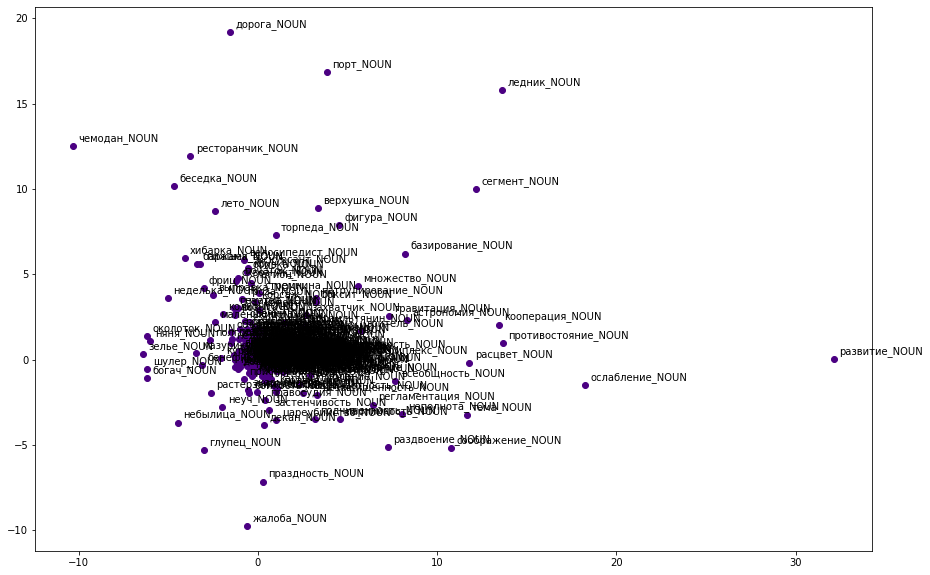

In [73]:
import matplotlib.pyplot as plt
import numpy as np
import random
x = [n[0] for n in lsa_for_graph]
y = [n[1] for n in lsa_for_graph]
plt.figure(figsize = (15, 10)) 
plt.scatter(x, y, color='#4B0082')


#plt.scatter(coords[:, 0], coords[:, 1], color='red')

for i, word in enumerate(nouns_for_graph):
    plt.annotate(word, xy=(lsa_for_graph[i, 0] + 0.3, lsa_for_graph[i, 1] + 0.3))
plt.show()

In [74]:
all_res = get_matrix(first_result)
lsa_all = lsa_matrix(all_res, 2)


x = [n[0] for n in lsa_all[100:-100]]
y = [n[1] for n in lsa_all[100:-100]]
x_first_100 = [n[0] for n in lsa_all[:100]]
y_first_100 = [n[1] for n in lsa_all[:100]]
x_last_100 = [n[0] for n in lsa_all[-100:]]
y_last_100 = [n[1] for n in lsa_all[-100:]]

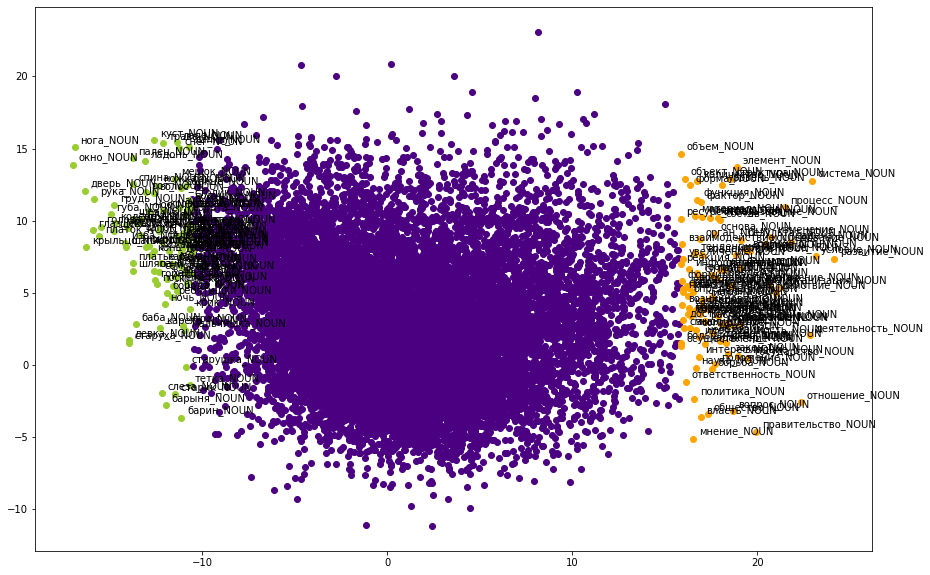

In [82]:
plt.figure(figsize = (15, 10)) 
plt.scatter(x, y, color='#4B0082')
plt.scatter(x_first_100, y_first_100, color='#FFA500')
plt.scatter(x_last_100, y_last_100, color='#9ACD32')

for i, word in enumerate(first_result[:100]):
    plt.annotate(word, xy=(x_first_100[i] + 0.3, y_first_100[i] + 0.3))

for i, word in enumerate(first_result[-100:]):
    plt.annotate(word, xy=(x_last_100[i] + 0.3, y_last_100[i] + 0.3))

Фиолетовые -- каждое двухсотое слово из отсортированного списка первой итерации, оранжевые -- первые сто слов этого же списка, зелёные -- последние сто слов этого же списка

In [162]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7, 4))
ax_3d = Axes3D(fig)
 
plt.show()

In [160]:
all_res = get_matrix(first_result)
lsa_all = lsa_matrix(all_res, 3)


x = [n[0] for n in lsa_all[100:-100]]
y = [n[1] for n in lsa_all[100:-100]]
z = [n[2] for n in lsa_all[100:-100]]
x_first_100 = [n[0] for n in lsa_all[:100]]
y_first_100 = [n[1] for n in lsa_all[:100]]
z_first_100 = [n[2] for n in lsa_all[:100]]
x_last_100 = [n[0] for n in lsa_all[-100:]]
y_last_100 = [n[1] for n in lsa_all[-100:]]
z_last_100 = [n[2] for n in lsa_all[-100:]]

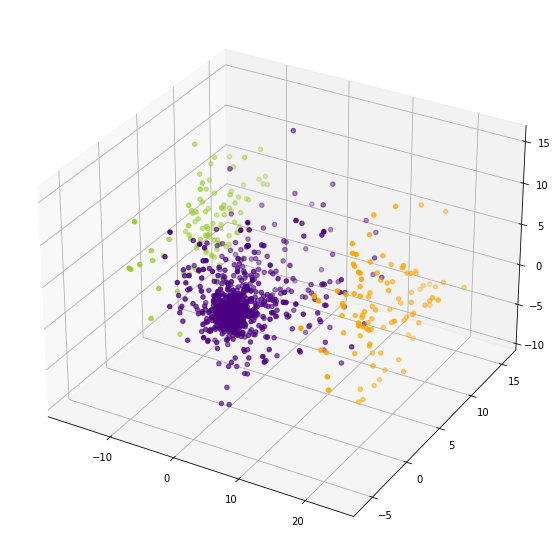

In [167]:
fig = plt.figure(figsize = (15, 10)) 

ax_3d = fig.add_subplot(projection='3d')

ax_3d.scatter(x[::50], y[::50], z[::50], color='#4B0082')
ax_3d.scatter(x_first_100, y_first_100, z_first_100, color='#FFA500')
ax_3d.scatter(x_last_100, y_last_100, z_last_100, color='#9ACD32')